In [8]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import grangercausalitytests

In [9]:
data = sm.datasets.get_rdataset("AirPassengers").data

#Rename coulmns correctly
data.columns = ['Time','Passengers']

#Create datetime index
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='ME')
data.set_index('Month', inplace=True)
data.head()

,Time,Passengers
Month,,
1949-01-31,1949.000000,112
1949-02-28,1949.083333,118
1949-03-31,1949.166667,132
1949-04-30,1949.250000,129
1949-05-31,1949.333333,121


In [10]:
data['Growth'] = data['Passengers'].diff()
data.dropna(inplace=True)
data.head()

,Time,Passengers,Growth
Month,,,
1949-02-28,1949.083333,118,6.0
1949-03-31,1949.166667,132,14.0
1949-04-30,1949.250000,129,-3.0
1949-05-31,1949.333333,121,-8.0
1949-06-30,1949.416667,135,14.0


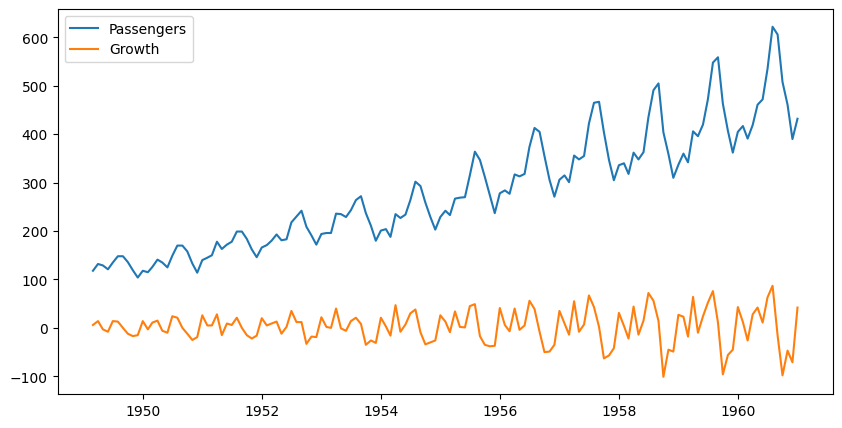

In [13]:
plt.figure(figsize=(10,5))
plt.plot(data['Passengers'], label = 'Passengers')
plt.plot(data['Growth'],label = 'Growth')
plt.legend()
plt.show()

In [14]:
granger_data = data[['Passengers','Growth']]

In [15]:
grangercausalitytests(granger_data, maxlag=4, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.8776 , p=0.0001  , df_denom=139, df_num=1
ssr based chi2 test:   chi2=17.2419 , p=0.0000  , df=1
likelihood ratio test: chi2=16.2728 , p=0.0001  , df=1
parameter F test:         F=16.8776 , p=0.0001  , df_denom=139, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7107  , p=0.0701  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=5.5798  , p=0.0614  , df=2
likelihood ratio test: chi2=5.4722  , p=0.0648  , df=2
parameter F test:         F=54.8173 , p=0.0000  , df_denom=137, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9003  , p=0.4429  , df_denom=135, df_num=3
ssr based chi2 test:   chi2=2.8009  , p=0.4234  , df=3
likelihood ratio test: chi2=2.7732  , p=0.4279  , df=3
parameter F test:         F=62.9462 , p=0.0000  , df_denom=135, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0180  , p=0.0955  

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(16.877634545802653),
    np.float64(6.776019631605102e-05),
    np.float64(139.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(17.241900039596956),
    np.float64(3.2909758647351475e-05),
    np.int64(1)),
   'lrtest': (np.float64(16.272826878498336),
    np.float64(5.4844843389757865e-05),
    np.int64(1)),
   'params_ftest': (np.float64(16.87763454580262),
    np.float64(6.776019631605287e-05),
    np.float64(139.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(2.710741823271253),
    np.float64(0.07005460916745682),
    np.float64(137.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(5.579775139872214),
    np.float64(0.06142811989421755),
    np.int64(2)),
   'lrtest': (np.float64(5.472200140524819),
    np.float64(0.06482265838794125),
    np.int64(2)),
   'params_ftest': (np.float64(54.81730549225362),
    np.float64(3.2333916745652544e-18),
    np.float64(137.0),
    2.0)},
   array([[0., 0., 1.,

In [16]:
granger_data_reverse = data[['Growth','Passengers']]
grangercausalitytests(granger_data_reverse, maxlag=4, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4992  , p=0.0204  , df_denom=139, df_num=1
ssr based chi2 test:   chi2=5.6178  , p=0.0178  , df=1
likelihood ratio test: chi2=5.5096  , p=0.0189  , df=1
parameter F test:         F=5.4992  , p=0.0204  , df_denom=139, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6395  , p=0.1979  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=3.3748  , p=0.1850  , df=2
likelihood ratio test: chi2=3.3350  , p=0.1887  , df=2
parameter F test:         F=12.1280 , p=0.0000  , df_denom=137, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7861  , p=0.5037  , df_denom=135, df_num=3
ssr based chi2 test:   chi2=2.4455  , p=0.4852  , df=3
likelihood ratio test: chi2=2.4244  , p=0.4891  , df=3
parameter F test:         F=6.3266  , p=0.0005  , df_denom=135, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2433  , p=0.9133  

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(5.499153079728319),
    np.float64(0.020440717800362836),
    np.float64(139.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(5.617839836844759),
    np.float64(0.01777854852716251),
    np.int64(1)),
   'lrtest': (np.float64(5.509559297784108),
    np.float64(0.018912811816730733),
    np.int64(1)),
   'params_ftest': (np.float64(5.499153079728272),
    np.float64(0.020440717800363332),
    np.float64(139.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(1.639508001390656),
    np.float64(0.19786006997534175),
    np.float64(137.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(3.374753696293175),
    np.float64(0.18500418211235634),
    np.int64(2)),
   'lrtest': (np.float64(3.3350003704392748),
    np.float64(0.18871823711113034),
    np.int64(2)),
   'params_ftest': (np.float64(12.128031452061753),
    np.float64(1.4141949221236795e-05),
    np.float64(137.0),
    2.0)},
   array([[0., 0., 1., 0., 0.]